# Proyecto Mineria de Datos

## Integrantes

Ignacio Basualto, Raimundo Vicente, Renato Cerda, Sebastián Bustos y  Diego Olguín

Elección de base de datos elegida gira entorno al tema: "Caracterizar series de anime". El dataset utilizado se encuentra en [link](https://www.kaggle.com/azathoth42/myanimelist)

## Motivación

Hoy en dia el anime forma gran parte de la cultura occidental, ha tenido un impacto grande en la sociedad; 
no solo dentro de japón si no que ha llegado a ser tendencia en todo el mundo. Como ejemplo de lo anterior se encuentra
Shingeki no Kyojin / Attack On Tittan que es un anime que actualmente se encuentra en emisión que ha tenido de los ratings y recepeciones más altos dentro de la
televisión y medios de comunicación. Por lo mismo el anime ha empezado a tener un efecto economico importante en la sociedad y por tal motivo es de interes poder comprender relaciones entre usuarios y los animes.

Dado lo anterior podría ser de interes estudiar este dataset para comprender 

- La demografía de los auditores de anime.
- El cambio que ha tenido el anime a lo largo de los años.
- Estudiar el efecto que tienen ciertos productores o personas en el exito del anime 
- Ser capaz de hacer recomendaciones a usuarios sobre posibles animes que pueden interesarles dado sus gustos

La base de datos presentada tiene tres sub datasets. **AnimeList:** Tiene la información de todos los animes que los usuarios han visto o quieren ver. **UserList:** Tiene toda la información de los usuarios. **AnimeUserList:** Tiene todos los pares (usuario,anime) donde el anime es alguno que el usuario ha marcado que esta interesado en ver o que ha visto.

Para AnimeList se decidieron borar columnas que presentaban un alto valor de NAN y aquellas que tenian información en otras columnas. Posterior a eso se borrar filas que tenina valores NAN. Para UserList se borraron columnas con un alto valor de NAN y se agregaron la información sobre los paises de los usuarios presentada en el mismo Kaggle de la base de datos [link](https://www.kaggle.com/azathoth42/myanimelist/discussion/87070). Y por ultimo en AnimeUserList se borraron columnas con muchos valores NAN y se borraron valores en las filas que fueron eliminados en columnas pasadas. El preprocesamiento en detalle se encuentra en [INSERTAR LINK]. Esta versión es una versión acortada del todo el estudio que se realizo, el jupyter notebook completo se encuentra en [Insertar Link]

## Exploración<a class="anchor" id="3.2"></a>

In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
Por default el codigo en python esta oculto. Para activarlo / desactivarlo, click <a href="javascript:code_toggle()">aqui</a>.''')

In [2]:
import pandas as pd
import numpy as np
import ast
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [3]:
animeList = pd.read_csv('Datos/animeListPreprocesada.csv')
userList = pd.read_csv('Datos/userListPreprocesada.csv')
userAnimeList = pd.read_csv('Datos/userAnimeListPreprocesada.csv')

In [4]:
listToDescribe = ['episodes','score','scored_by','members','favorites','duration_min']
animeList[listToDescribe].describe()

,episodes,score,scored_by,members,favorites,duration_min
count,6421.000000,6421.000000,6.421000e+03,6.421000e+03,6421.000000,6421.000000
mean,14.592120,6.884675,2.484137e+04,4.898079e+04,683.235789,28.907203
std,41.259427,0.879056,6.190538e+04,1.064004e+05,3796.057196,25.364305
min,1.000000,2.330000,2.000000e+00,3.100000e+01,0.000000,0.200000
25%,1.000000,6.380000,8.280000e+02,2.556000e+03,3.000000,20.000000
50%,6.000000,6.950000,4.389000e+03,1.118700e+04,23.000000,24.000000
75%,13.000000,7.470000,2.083000e+04,4.537600e+04,153.000000,28.000000
max,1818.000000,9.250000,1.009477e+06,1.456378e+06,106895.000000,163.000000


Dado que son muchos generos no se mostrara su tabla de estadistica de resumen, para eso mostraremos un grafico con la cantidad y el promedio.

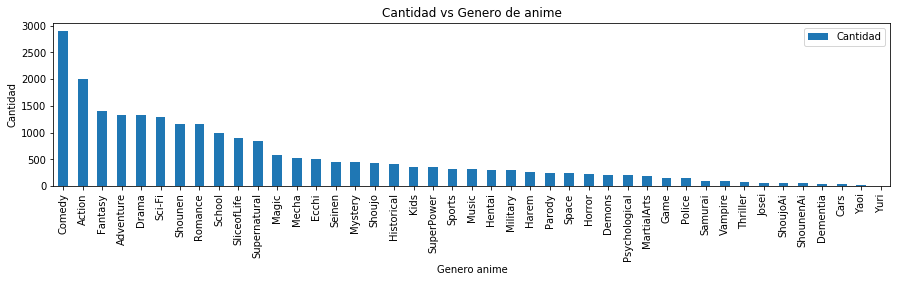

In [5]:
genreAnimeList = animeList.drop(columns = ['anime_id', 'title', 'type', 'source','episodes','score','scored_by','members','favorites','duration_min','airing','rating','related','studio','aired_initial_year','aired_final_year'])

diccGenereSum = {}

for columns in genreAnimeList.columns:
    listOfColumn = genreAnimeList[columns].tolist()
    diccGenereSum[columns] = sum(listOfColumn)

dataFrameGenereSum  = pd.DataFrame(diccGenereSum.values(), columns=['Cantidad'])
dataFrameGenereSum.index = list(diccGenereSum.keys())
dataFrameGenereSum = dataFrameGenereSum.sort_values(by=['Cantidad'],ascending = False)

dataFrameGenereSum.plot.bar(figsize =(15,3))
plt.xlabel('Genero anime')
plt.ylabel('Cantidad')
plt.title('Cantidad vs Genero de anime')
plt.show()

En el grafico se puede apreciar como hay una clara preferencia por el genero de comedia. Miremos la cantidad de animes que han sido iniciados por año

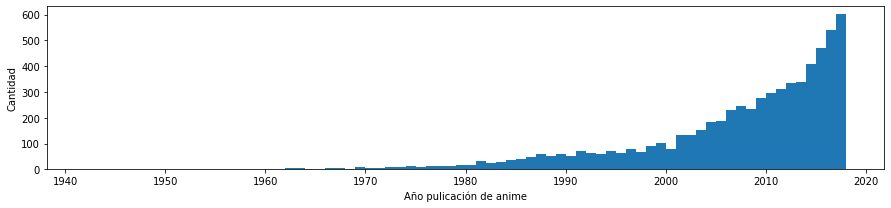

In [6]:
yearList = animeList['aired_initial_year'].tolist()

plt.figure(figsize=(15,3))
plt.hist(yearList,bins = 76)
plt.ylabel('Cantidad')
plt.xlabel('Año pulicación de anime')
plt.show()

Como se puede apreciar en los ultimos años se ha tenido un crecimiento exponencial en la cantidad de animes que han sido publicados, luego es de interes entender cuales son las tendencias que han ido apareciendo y cuales han tenido un mayor efecto en los usuarios.

In [7]:
studioList = animeList['studio'].tolist()
uniqueSize = len(animeList['studio'].unique())

# Tabla de frecuencias
dataFrame = pd.DataFrame(studioList,columns=['Studio'])
dataFrame = dataFrame.sort_values(by = 'Studio')
dataFrame['Studio'].value_counts().head()

Toei Animation    396
Sunrise           272
Madhouse          240
J.C.Staff         230
Studio Pierrot    222
Name: Studio, dtype: int64

Existen demasiados estudios de anime para observar relaciones de manera grafica, pero hay algunos que tienen más distribución que las demas pero como se puede observar en la tabla de frecuencias el estudio "Toei Animation" tiene una predominancia en la cantidad de animes, luego surge la pregunta si posible predecir la popularidad de un anime teniendo en cuenta el estudio por el que fue hecho y más caracteristicas que pueden estar presentes.

In [8]:
userList.describe()

,user_watching,user_completed,user_onhold,user_dropped,user_plantowatch,user_days_spent_watching,stats_mean_score,stats_rewatched,stats_episodes
count,108705.000000,108705.000000,108705.000000,108705.000000,108705.000000,108705.000000,108705.000000,108705.000000,108705.000000
mean,14.767453,196.462012,11.388280,11.733950,75.579596,61.915104,7.747605,14.198372,3779.946074
std,32.747425,244.950891,30.831647,30.979778,178.658230,59.213037,1.451397,55.378247,3678.416095
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.500694,0.000000,0.000000,7.000000
25%,3.000000,50.000000,0.000000,0.000000,6.000000,21.065278,7.330000,0.000000,1269.000000
50%,7.000000,123.000000,4.000000,3.000000,27.000000,46.195139,7.890000,1.000000,2797.000000
75%,16.000000,254.000000,12.000000,12.000000,81.000000,84.462500,8.460000,10.000000,5136.000000
max,2934.000000,5479.000000,2562.000000,2457.000000,12051.000000,952.654595,10.000000,9404.000000,62347.000000


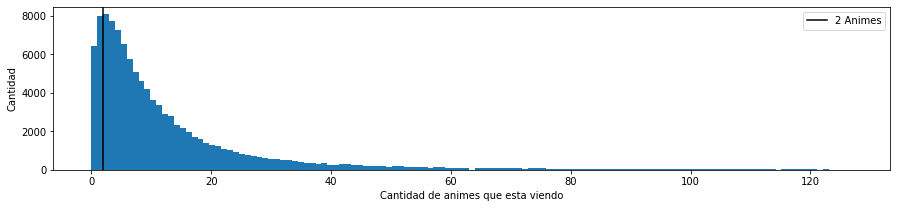

In [9]:
viewingList = userList['user_watching'].tolist()
viewingList = sorted(viewingList)[:len(viewingList)-1000]

plt.figure(figsize=(15,3))
plt.hist(viewingList,bins = 129)
plt.axvline(x=2,color='black',label='2 Animes')
plt.legend()
plt.ylabel('Cantidad')
plt.xlabel('Cantidad de animes que esta viendo')
plt.show()

Como se puede apreciar la mayoria de las personas ven 2 animes a la vez, y el numero empieza a decrecer exponencialmente. También notamos que existe un número no menor de personas que no estan viendo nigún anime luego sería de interes revisar si han visto alguna vez anime, si la respuesta es no estos usuarios no parecierían generar información para estudiar y entonces podrían no considerarse en los datos para los siguientes hitos. Ahora observemos la identidad de Genero de los usuarios.

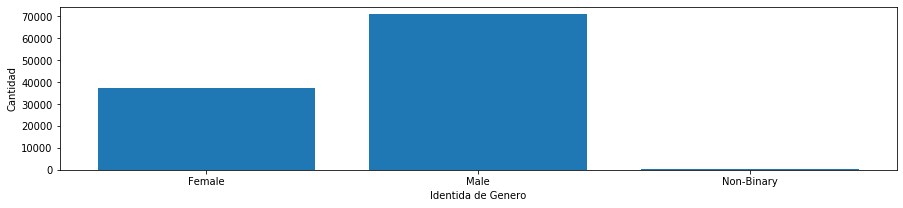

In [12]:
userGender = userList['gender'].tolist()

diccToPlot = {}

for gender in userGender:
    if(not gender in diccToPlot):
        diccToPlot[gender] = 0
    diccToPlot[gender] += 1
    
plt.figure(figsize=(15,3))
plt.bar(range(len(diccToPlot)), list(diccToPlot.values()), align='center')
plt.xticks(range(len(diccToPlot)), list(diccToPlot.keys()))
plt.xlabel('Identida de Genero')
plt.ylabel('Cantidad')
plt.show()

Como se puede apreciar existe una diferencia entre la cantida de usuarios que se identifican como hombre, mujer y no binario. Ahora observemos la edad de los usuarios

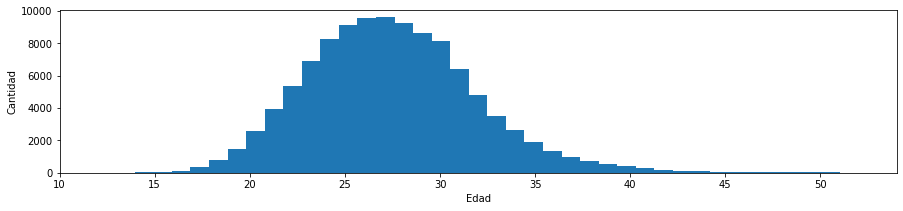

In [13]:
from datetime import date, datetime

def calculate_age(born):
    today = date.today()
    return today.year - born.year - ((today.month, today.day) < (born.month, born.day))

listAge = []
bornDate = userList['birth_date'].tolist()
for i in bornDate:
    i = datetime.strptime(i, '%Y-%m-%d').date()
    listAge.append(calculate_age(i))

listAge = sorted(listAge)

plt.figure(figsize=(15,3))
plt.hist(listAge,bins = len(np.unique(listAge)))
plt.ylabel('Cantidad')
plt.xlabel('Edad')
plt.show()

In [14]:
print('Mean: '+str(np.mean(listAge)))
print('Std: '+str(np.std(listAge)))

Mean: 27.389098937491376
Std: 4.636767368546361


Como se puede apreciar se tiene una curva Gaussiana con promedio de 27 años y desviación estandar de 4 años.

Por otro lado estudiemos el crecimiento que ha tenido la plataforma y la actividad de los usuarios

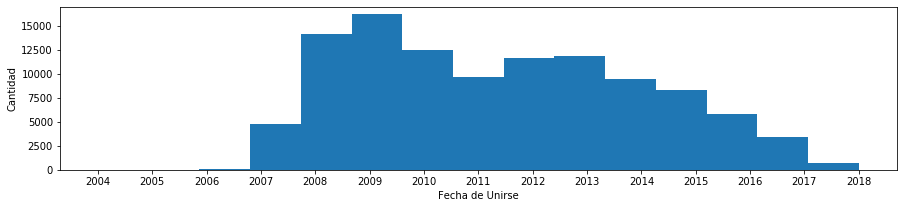

In [15]:
listJoinDate = []
joinDate = userList['join_date'].tolist()
for i in joinDate:
    listJoinDate.append(i.split('-')[0])

listJoinDate = sorted(listJoinDate)

plt.figure(figsize=(15,3))
plt.hist(listJoinDate,bins = len(np.unique(listJoinDate)))
plt.ylabel('Cantidad')
plt.xlabel('Fecha de Unirse')
plt.show()

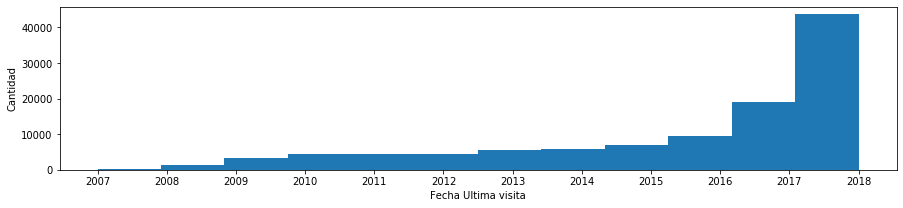

In [16]:
listJoinDate = []
joinDate = userList['last_online'].tolist()
for i in joinDate:
    listJoinDate.append(i.split('-')[0])

listJoinDate = sorted(listJoinDate)

plt.figure(figsize=(15,3))
plt.hist(listJoinDate,bins = len(np.unique(listJoinDate)))
plt.ylabel('Cantidad')
plt.xlabel('Fecha Ultima visita')
plt.show()

Como se puede apreciar la cantidad de gente que se ha unido a la pagina en los ultimos años ha disminuido pero el uso de la plataforma se ha mantendio activo. Por otro lado estudiemos el rango etario de los usuarios. Una distribución factible es **Menores de 18**,**De 18 a 30 Años** y **Mayores de 30**.

In [17]:
diccRangoEtario = {'menor 18':[],'18 a 30':[],'mayor 30':[]}

bornDate = userList[['username','birth_date']]

for i in range(len(bornDate)):
    age = calculate_age(datetime.strptime(bornDate.loc[i,'birth_date'], '%Y-%m-%d').date())
    if(age <18):
        diccRangoEtario['menor 18'].append(bornDate.loc[i,'username'])
    elif(age <= 30):
        diccRangoEtario['18 a 30'].append(bornDate.loc[i,'username'])
    else:
        diccRangoEtario['mayor 30'].append(bornDate.loc[i,'username'])

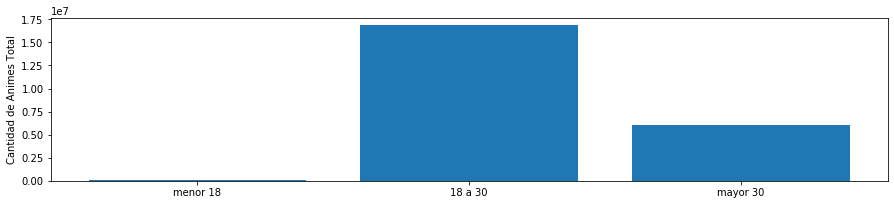

In [18]:
# Se demora en correr
animeSeenMenor = 0
animeSeenIntermedio = 0
animeSeenMayor = 0

for i in range(len(userList)):
    username = userList.loc[i,'username']
    if(username in diccRangoEtario['menor 18']):
        animeSeenMenor +=userList.loc[i,'user_watching']+userList.loc[i,'user_completed'] 
    elif(username in diccRangoEtario['18 a 30']):
        animeSeenIntermedio +=userList.loc[i,'user_watching'] +userList.loc[i,'user_completed'] 
    else:
        animeSeenMayor +=userList.loc[i,'user_watching'] +userList.loc[i,'user_completed'] 
        
diccSeen = {'menor 18':animeSeenMenor,'18 a 30':animeSeenIntermedio,'mayor 30':animeSeenMayor}
plt.figure(figsize=(15,3))
plt.bar(diccSeen.keys(),diccSeen.values())
plt.ylabel('Cantidad de Animes Total')
plt.show()

Como se puede apreciar la clasificación "18 a 30" es la que predomina. A continuación estudiemos los generos de anime con respecto a las identidades de genero

In [19]:
maleUsers = userList['gender']=='Male'
maleUsers = userList[maleUsers]

maleUsersUsername = maleUsers['username'].tolist()

maleUsersAnimes = userAnimeList[userAnimeList['username'].isin(maleUsersUsername)]
maleUsersAnimes = maleUsersAnimes['anime_id'].tolist()

femaleUsers = userList['gender']=='Female'
femaleUsers = userList[femaleUsers]

femaleUsersUsername = femaleUsers['username'].tolist()

femaleUsersAnimes = userAnimeList[userAnimeList['username'].isin(femaleUsersUsername)]
femaleUsersAnimes = femaleUsersAnimes['anime_id'].tolist()

nonBinaryUsers = userList['gender']=='Non-Binary'
nonBinaryUsers = userList[nonBinaryUsers]

nonBinaryUsersUsername = nonBinaryUsers['username'].tolist()

nonBinaryUsersAnimes = userAnimeList[userAnimeList['username'].isin(nonBinaryUsersUsername)]
nonBinaryUsersAnimes = nonBinaryUsersAnimes['anime_id'].tolist()

maleAnimeList = animeList[animeList['anime_id'].isin(maleUsersAnimes)]

genreAnimeList = maleAnimeList.drop(columns = ['anime_id', 'title', 'type', 'source','episodes','score','scored_by','members','favorites','duration_min','airing','rating','related','studio','aired_initial_year','aired_final_year'])

diccGenereSum = {}

for columns in genreAnimeList.columns:
    listOfColumn = genreAnimeList[columns].tolist()
    diccGenereSum[columns] = sum(listOfColumn)

dataFrameGenereSum  = pd.DataFrame(diccGenereSum.values(), columns=['Cantidad'])
dataFrameGenereSum.index = list(diccGenereSum.keys())
dataFrameGenereSum = dataFrameGenereSum.sort_values(by=['Cantidad'],ascending = False)

maleGenere = list(dataFrameGenereSum.index)

femaleAnimeList = animeList[animeList['anime_id'].isin(femaleUsersAnimes)]

genreAnimeList = femaleAnimeList.drop(columns = ['anime_id', 'title', 'type', 'source','episodes','score','scored_by','members','favorites','duration_min','airing','rating','related','studio','aired_initial_year','aired_final_year'])

diccGenereSum = {}

for columns in genreAnimeList.columns:
    listOfColumn = genreAnimeList[columns].tolist()
    diccGenereSum[columns] = sum(listOfColumn)

dataFrameGenereSum  = pd.DataFrame(diccGenereSum.values(), columns=['Cantidad'])
dataFrameGenereSum.index = list(diccGenereSum.keys())
dataFrameGenereSum = dataFrameGenereSum.sort_values(by=['Cantidad'],ascending = False)

femaleGenere = list(dataFrameGenereSum.index)

nonBinaryAnimeList = animeList[animeList['anime_id'].isin(nonBinaryUsersAnimes)]

genreAnimeList = nonBinaryAnimeList.drop(columns = ['anime_id', 'title', 'type', 'source','episodes','score','scored_by','members','favorites','duration_min','airing','rating','related','studio','aired_initial_year','aired_final_year'])

diccGenereSum = {}

for columns in genreAnimeList.columns:
    listOfColumn = genreAnimeList[columns].tolist()
    diccGenereSum[columns] = sum(listOfColumn)

dataFrameGenereSum  = pd.DataFrame(diccGenereSum.values(), columns=['Cantidad'])
dataFrameGenereSum.index = list(diccGenereSum.keys())
dataFrameGenereSum = dataFrameGenereSum.sort_values(by=['Cantidad'],ascending = False)

nonBinaryGenere = list(dataFrameGenereSum.index)

listaValores = []
for i in range(len(nonBinaryGenere)):
    listaValores.append([maleGenere[i],femaleGenere[i],nonBinaryGenere[i]])

orderdf = pd.DataFrame(listaValores,columns = ['Male','Female','Non-Binary'])

Se puede apreciar si existe cierta diferencia entre los generos de anime vistos y la identidad de genero, estas diferencias se presentan a continuación (solo se muestra el head del data frame).

In [20]:
aux1 = orderdf['Male'] != orderdf['Female']
aux2 = orderdf['Female'] != orderdf['Non-Binary']
aux3 = orderdf['Male'] != orderdf['Non-Binary']

In [21]:
orderdf[aux1 | aux2 | aux3].head()

,Male,Female,Non-Binary
3,Adventure,Adventure,Drama
4,Drama,Drama,Adventure
6,Shounen,Shounen,Romance
7,Romance,Romance,Shounen
18,Kids,SuperPower,SuperPower


Se puede apreciar la diferencia entre Male y Female se encuentra en los valores centrales del ranking, mientras que las diferencias entre Female y Non-Binary / Male y Non-Binary se encuentran distribuidos a traves del ranking y en mucha mayor cantidad que Male y Female. Es de interes ver si es posible predecir la identidad de genero dado los animes que el usuario a visto. Además de esta pregunta se puede plantear un la idea de generar un recomendador de animes, dado un usuario y cierta lista de animes que ha visto tiene un valor importante, al menos desde un punto de vista economico, ser capaz de entregar animes que pueden interesarle al usuario.

A continuación observemos la distribución de los generos de anime versus el rango etario al que pertenecen los usuarios.

In [22]:
menorUsersAnimes = userAnimeList[userAnimeList['username'].isin(diccRangoEtario['menor 18'])]
menorUsersAnimes = menorUsersAnimes['anime_id'].tolist()

intermedioUsersAnimes = userAnimeList[userAnimeList['username'].isin(diccRangoEtario['18 a 30'])]
intermedioUsersAnimes = intermedioUsersAnimes['anime_id'].tolist()

mayorUsersAnimes = userAnimeList[userAnimeList['username'].isin(diccRangoEtario['mayor 30'])]
mayorUsersAnimes = mayorUsersAnimes['anime_id'].tolist()

menorAnimeList = animeList[animeList['anime_id'].isin(menorUsersAnimes)]

menorAnimeList = menorAnimeList.drop(columns = ['anime_id', 'title', 'type', 'source','episodes','score','scored_by','members','favorites','duration_min','airing','rating','related','studio','aired_initial_year','aired_final_year'])

diccSum = {}

for columns in menorAnimeList.columns:
    listOfColumn = menorAnimeList[columns].tolist()
    diccSum[columns] = sum(listOfColumn)

dataFrameSum  = pd.DataFrame(diccSum.values(), columns=['Cantidad'])
dataFrameSum.index = list(diccSum.keys())
dataFrameSum = dataFrameSum.sort_values(by=['Cantidad'],ascending = False)

menorList = list(dataFrameSum.index)

intermedioAnimeList = animeList[animeList['anime_id'].isin(intermedioUsersAnimes)]

intermedioAnimeList = intermedioAnimeList.drop(columns = ['anime_id', 'title', 'type', 'source','episodes','score','scored_by','members','favorites','duration_min','airing','rating','related','studio','aired_initial_year','aired_final_year'])

diccSum = {}

for columns in intermedioAnimeList.columns:
    listOfColumn = intermedioAnimeList[columns].tolist()
    diccSum[columns] = sum(listOfColumn)

dataFrameSum  = pd.DataFrame(diccSum.values(), columns=['Cantidad'])
dataFrameSum.index = list(diccSum.keys())
dataFrameSum = dataFrameSum.sort_values(by=['Cantidad'],ascending = False)

intermedio = list(dataFrameSum.index)

mayoresAnimeList = animeList[animeList['anime_id'].isin(mayorUsersAnimes)]

mayoresAnimeList = mayoresAnimeList.drop(columns = ['anime_id', 'title', 'type', 'source','episodes','score','scored_by','members','favorites','duration_min','airing','rating','related','studio','aired_initial_year','aired_final_year'])

diccSum = {}

for columns in mayoresAnimeList.columns:
    listOfColumn = mayoresAnimeList[columns].tolist()
    diccSum[columns] = sum(listOfColumn)

dataFrameSum  = pd.DataFrame(diccSum.values(), columns=['Cantidad'])
dataFrameSum.index = list(diccSum.keys())
dataFrameSum = dataFrameSum.sort_values(by=['Cantidad'],ascending = False)

mayorList = list(dataFrameSum.index)

listaValores = []
for i in range(len(menorList)):
    listaValores.append([menorList[i],intermedio[i],mayorList[i]])

orderdf = pd.DataFrame(listaValores,columns = ['menor 18', '18 a 30', 'mayor 30'])

Se puede apreciar que si existe cierta diferencia entre los generos de anime vistos y el rango etario, estas diferencias se presentan a continuación en el dataframe (solo se imprime el head)

In [23]:
aux1 = orderdf['menor 18'] != orderdf['18 a 30']
aux2 = orderdf['menor 18'] != orderdf['mayor 30']
aux3 = orderdf['18 a 30'] != orderdf['mayor 30']

orderdf[aux1 | aux2 | aux3].head()

,menor 18,18 a 30,mayor 30
3,Drama,Adventure,Adventure
4,Adventure,Drama,Drama
6,Romance,Shounen,Shounen
7,Shounen,Romance,Romance
9,Supernatural,SliceofLife,SliceofLife


Como se puede apreciar existe una diferencia substancial entre menor de 18 y las otras dos categorias, mientras que ser mayor de 30 o entre 18 a 30 son más similares. Luego surge la pregunta si dados los animes que ha visto el usuario es posible predecir el rango etario. Por otro lado uno se pregunta si es posible determinar una mejor clasificación para rango etario que permita un mejor analisis.

## Trabajo realizado por cada integrante:

* Ignacio Basualto
* Raimundo Vicente 
* Renato Cerda 
* Sebastián Bustos 
* Diego Olguín